### Problem Understanding
    - Background
    - Goals
    - Outcomes Expected

### Reading and Understanding the dataset

In [1]:
import numpy as np      # mathemtical operations
import pandas as pd     # data analysis and manipulations

import matplotlib.pyplot as plt    # visualization
%matplotlib inline
import seaborn as sns              # visualization

In [2]:
# read the dataset

data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data['Prospect ID'].nunique()

9240

In [4]:
data['Lead Number'].nunique()

9240

In [5]:
# The following columns have unique values for each lead
# Prospect ID
# Lead Number

In [6]:
# size of the dataset: number of records and features

data.shape

(9240, 37)

In [7]:
# basic information on the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# There are a few columns with significant null values

In [9]:
# numerical desciption of the dataset

data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# There could be outliers in the following columns:
# Total Time Spent on Website
# TotalVisits

### Data Cleaning
    - missing values
    - outliers

In [11]:
# Look at the null values in the dataset

missing_values = data.isnull().sum()
missing_values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# The dataset also contains null values in form of string 'Select'
# Find out the 'Select' null values in the dataset

select_values = (data == 'Select').sum()
select_values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# combine the total null values and look at the final percentages in the dataset

total_missing_values = missing_values+select_values
total_missing_values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# Look at the percent total missing values in the dataset

perc_total_missing_values = round( total_missing_values * 100 / len(data), 2 )
non_zero_missing_values = perc_total_missing_values[perc_total_missing_values>0].sort_values(ascending=False)
non_zero_missing_values

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [15]:
# There are 7 columns with more than 40 % null values
# drop such columns

for col in non_zero_missing_values.index:
    if non_zero_missing_values[col]>40:
        data.drop(columns=col, inplace=True, axis=1)


In [16]:
# check size of the dataset: number of records and features

data.shape

(9240, 30)

In [17]:
# There are 6 columns with more than 25 % null values
# impute the missing values with 'No Input'

non_zero_missing_values = non_zero_missing_values[non_zero_missing_values<40]
# non_zero_missing_values

for col in non_zero_missing_values.index:
    if non_zero_missing_values[col]>25:
        # print(col)
        data[col] = data[col].fillna(value='No Input')
        data[col] = data[col].replace(to_replace='Select', value='No Input')


In [18]:
# check for any select or missing values left

non_zero_missing_values = non_zero_missing_values[non_zero_missing_values<25]
non_zero_missing_values


TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64

In [19]:
# The percentage of such null values now is very small
# Categorical columns can be imputed with 'No Input'
# Numerical columns can be imputed with median/mean

for col in non_zero_missing_values.index:
    print(data[col].dtype)

# Extract numerical and categorical columns from the missing value columns
missing_values_catCols = [col for col in non_zero_missing_values.index if data[col].dtype=='object']
missing_values_numCols = [col for col in non_zero_missing_values.index if data[col].dtype=='float64']

# Impute categorical column missing values with 'No Input'
for col in missing_values_catCols:
    data[col] = data[col].fillna(value='No Input')
    data[col] = data[col].replace(to_replace='Select', value='No Input')

# Inpute numerical column missing values with respective median
for col in missing_values_numCols:
    data[col] = data[col].fillna(value=data[col].median())
    data[col] = data[col].replace(to_replace='Select', value=data[col].median())


float64
float64
object
object


In [20]:
# check if any missing or select values remaining

data.isnull().sum() + (data=='Select').sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [21]:
# All missing values are treated

In [22]:
# Look at the outliers in the dataset numerical columns

In [23]:
# Check dtypes in the dataset columns
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

In [24]:
# extract numerical columns from the dataset

catCols = [col for col in data.columns if data[col].dtype=='object']
numCols = [col for col in data.columns if data[col].dtype!='object']

print('categorical columns:\n', catCols)
print('\nnumerical columns:\n', numCols)

categorical columns:
 ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

numerical columns:
 ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


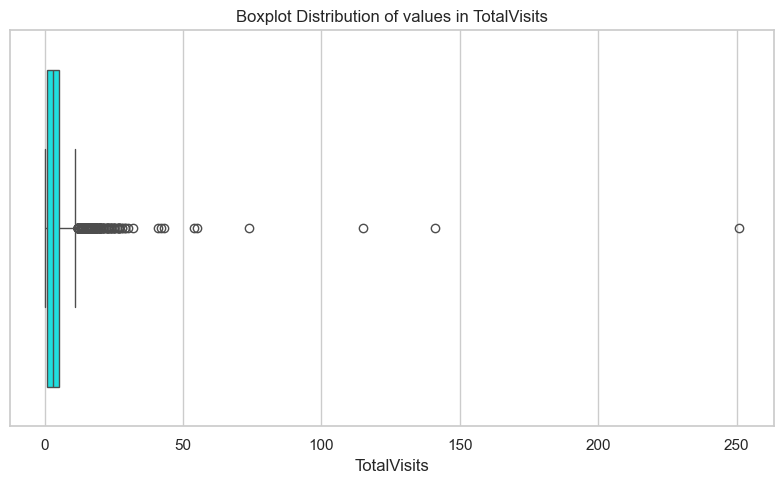

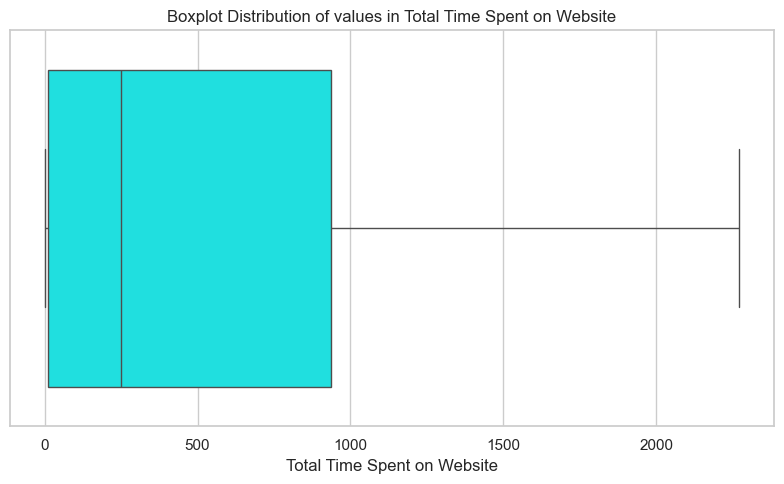

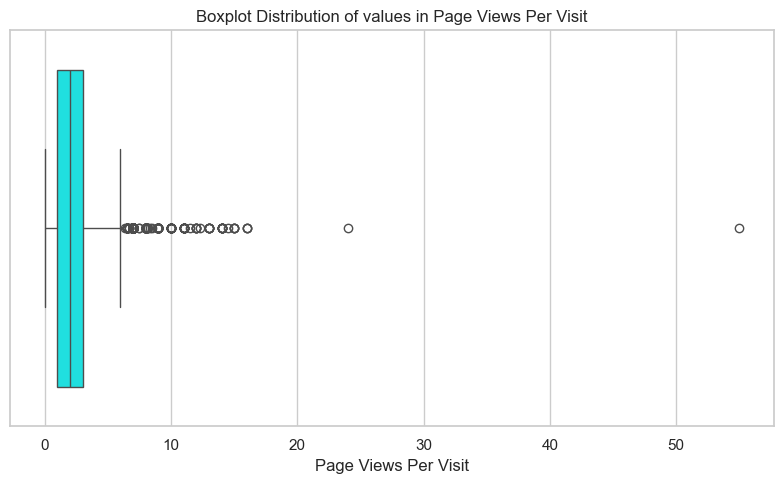

In [25]:
# Plot box plots for all the numerical columns except 'Lead Number' and 'Converted' variables

sns.set(style="whitegrid")

for col in numCols:
    if col != 'Lead Number' and col != 'Converted':
        plt.figure(figsize=(8,5))

        # Box plot to visualize distribution of values
        sns.boxplot(x=data[col], color='cyan')
        plt.title(f'Boxplot Distribution of values in {col}')

        plt.tight_layout()
        plt.show()


In [26]:
# 'TotalVisits' has outliers

data['TotalVisits'].quantile(q=[0,0.25,0.5,0.75,0.9,0.95,0.99,1] )

0.00      0.0
0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [27]:
# 'Page Views Per Visit' has outliers

data['Page Views Per Visit'].quantile(q=[0,0.25,0.5,0.75,0.9,0.95,0.99,1] )

0.00     0.0
0.25     1.0
0.50     2.0
0.75     3.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [28]:
# The columns 'TotalVisits' and 'Page Views Per Visit' can be limited to their 99 percentile values

data = data[data['TotalVisits']<=17]
data = data[data['Page Views Per Visit']<=9]

In [29]:
data.shape

(9090, 30)

In [30]:
# Now outliers are treated by capping/limiting the values of 2 columns within 99% percentile

In [31]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.262836
std,23392.354280,0.486501,2.881884,547.243973,1.881164
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596502.500000,0.000000,1.000000,9.000000,1.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
75%,637360.750000,1.000000,4.000000,930.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


### EDA:
    - Univariate
    - Bivariate
    - Multivariate

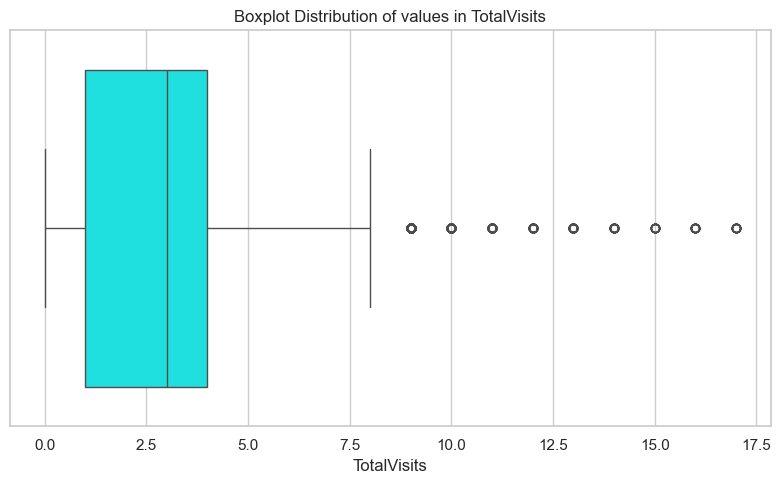

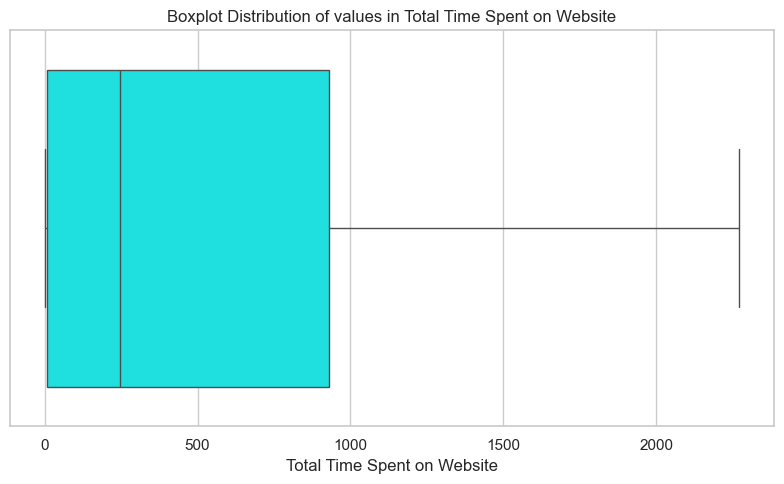

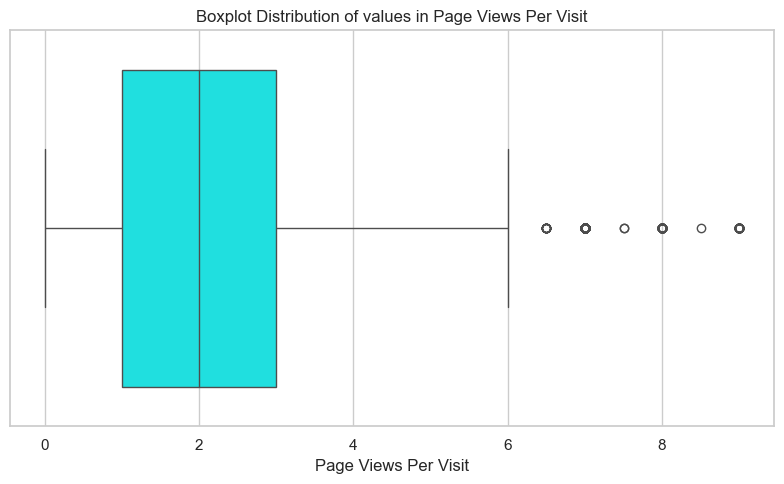

In [32]:
# Plot box plots for all the numerical columns except 'Lead Number' and 'Converted' variables

sns.set(style="whitegrid")

for col in numCols:
    if col != 'Lead Number' and col != 'Converted':
        plt.figure(figsize=(8,5))

        # Box plot to visualize distribution of values
        sns.boxplot(x=data[col], color='cyan')
        plt.title(f'Boxplot Distribution of values in {col}')

        plt.tight_layout()
        plt.show()


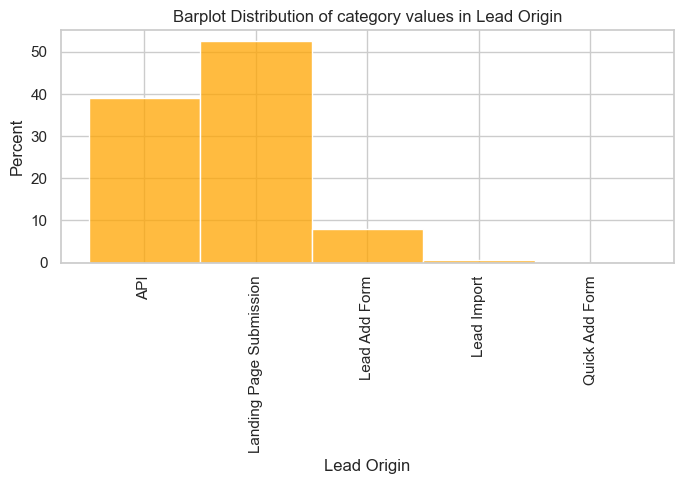

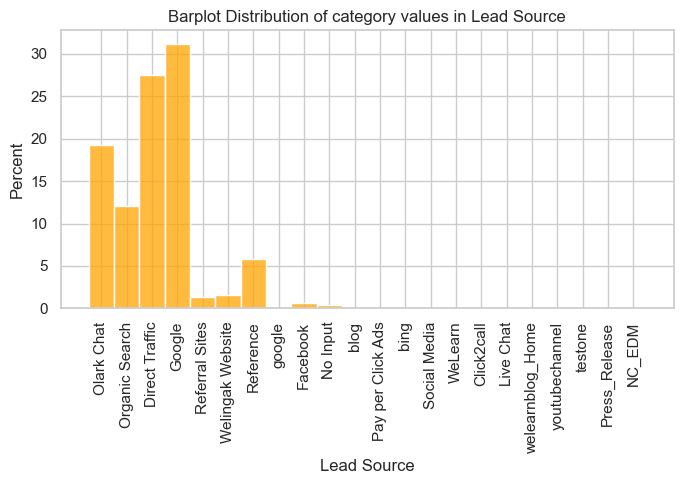

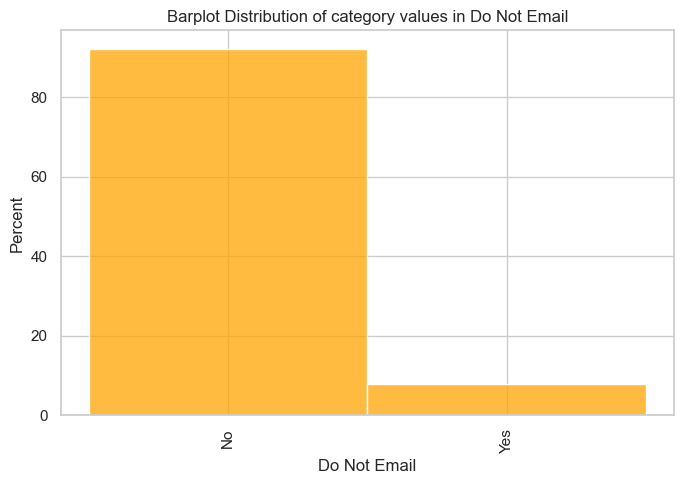

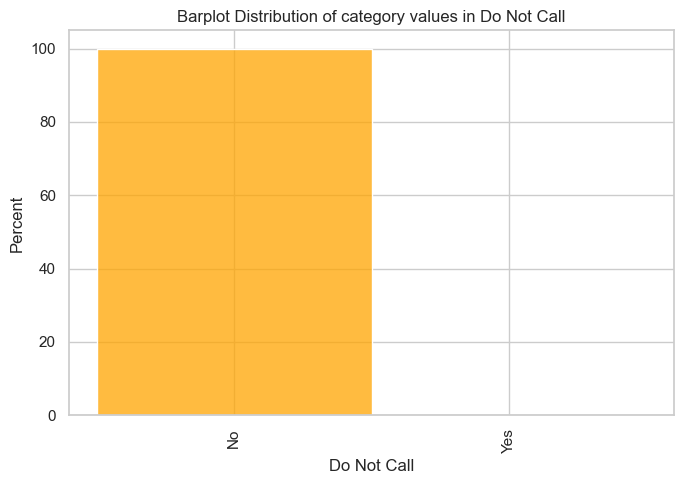

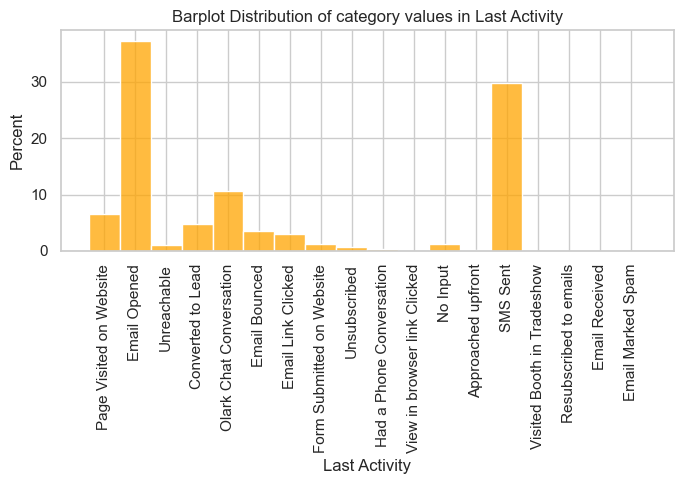

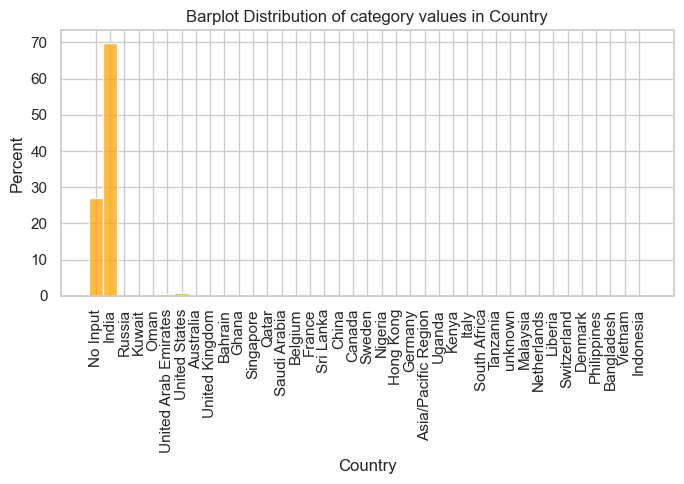

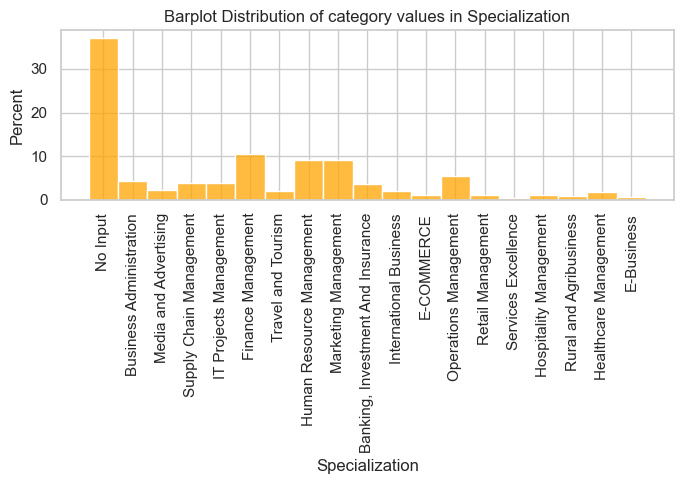

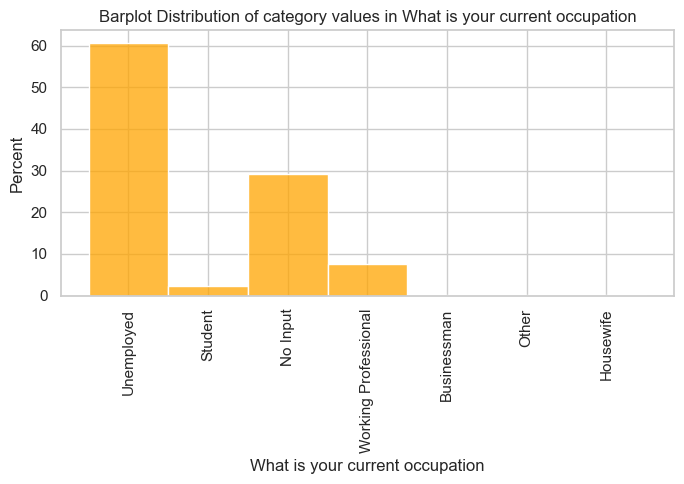

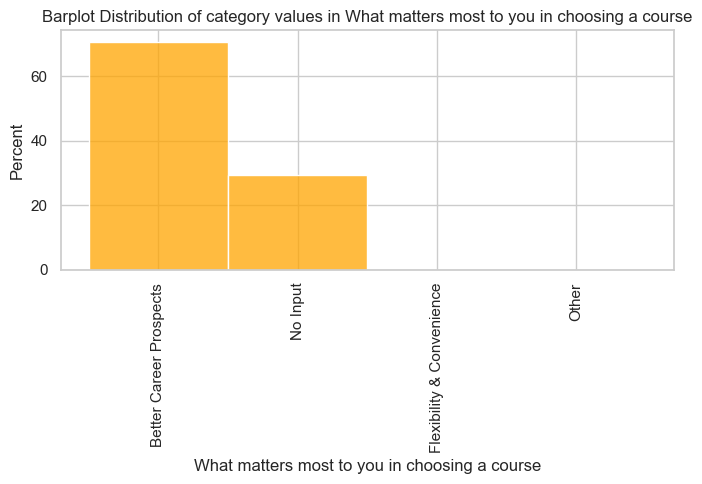

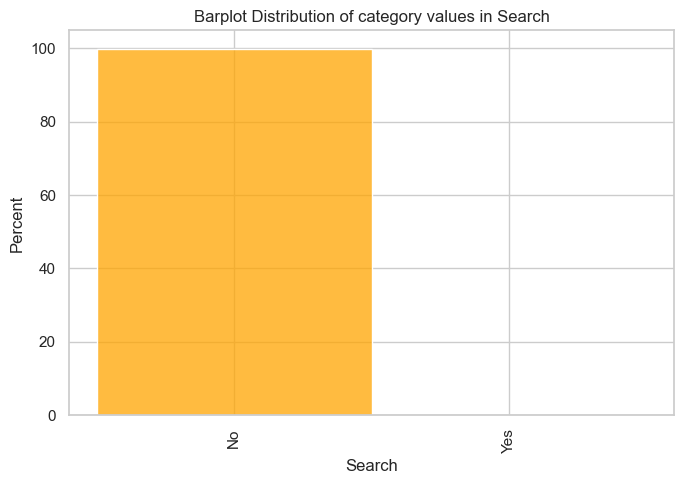

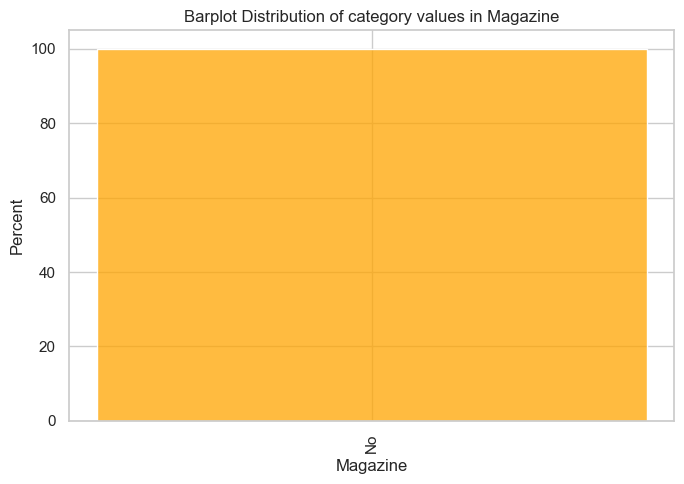

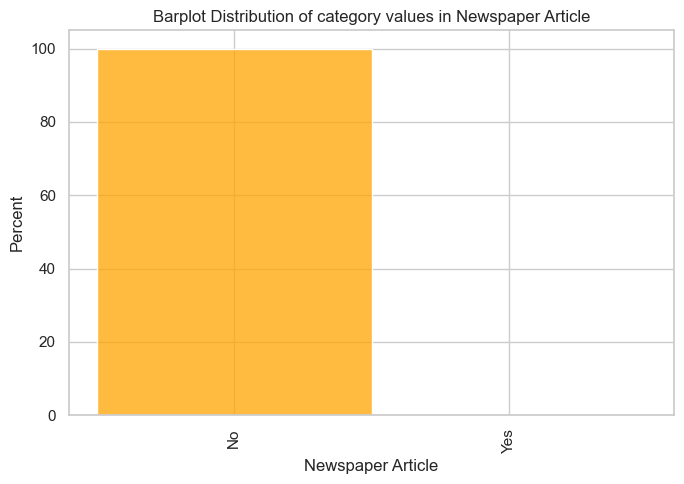

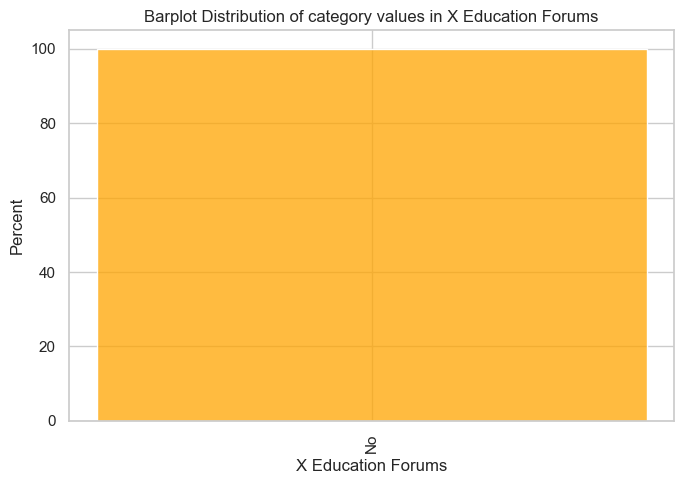

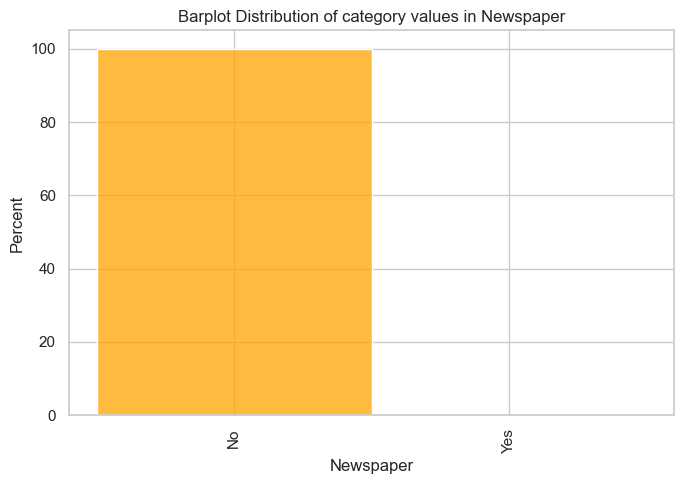

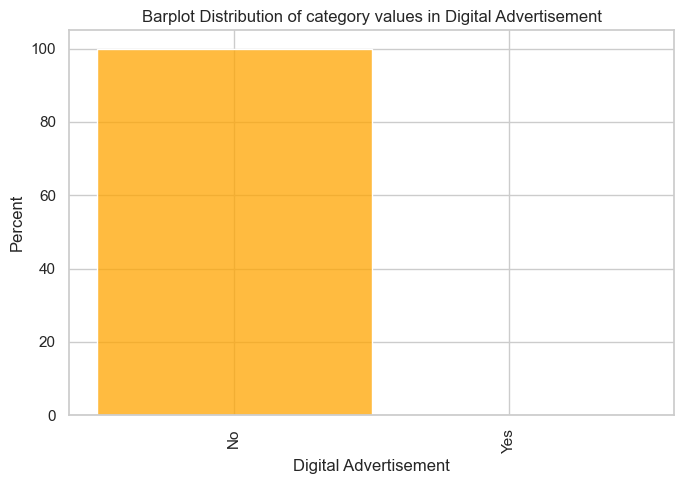

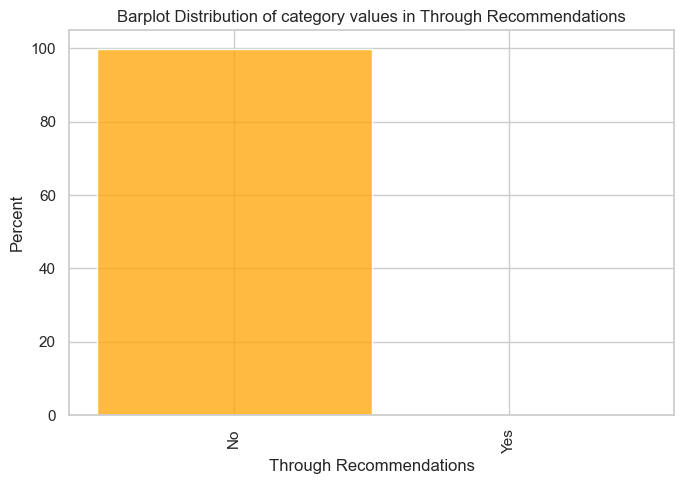

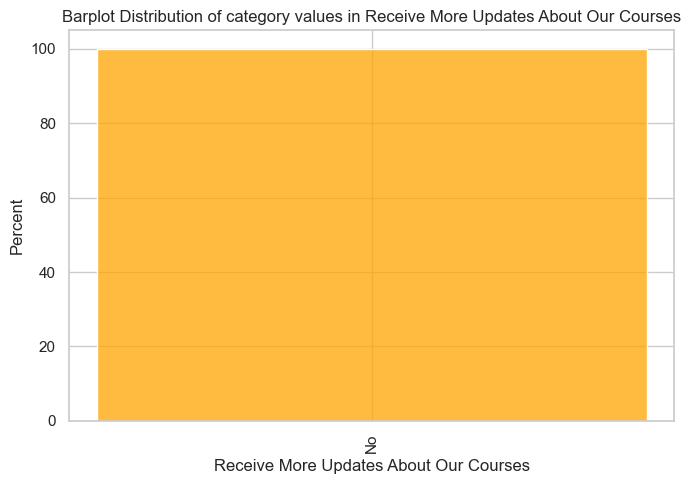

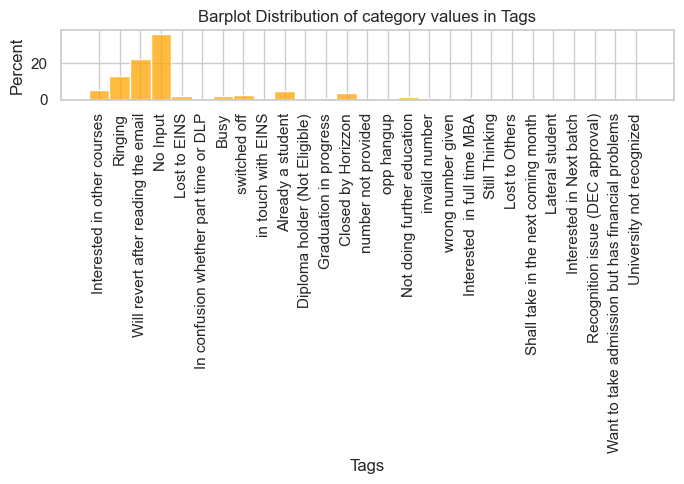

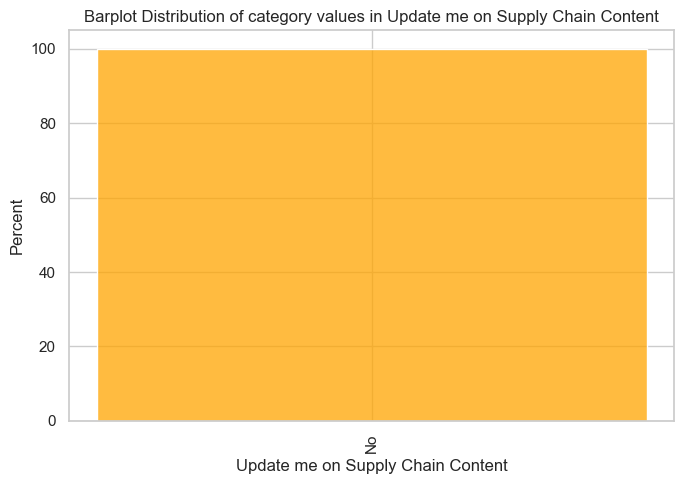

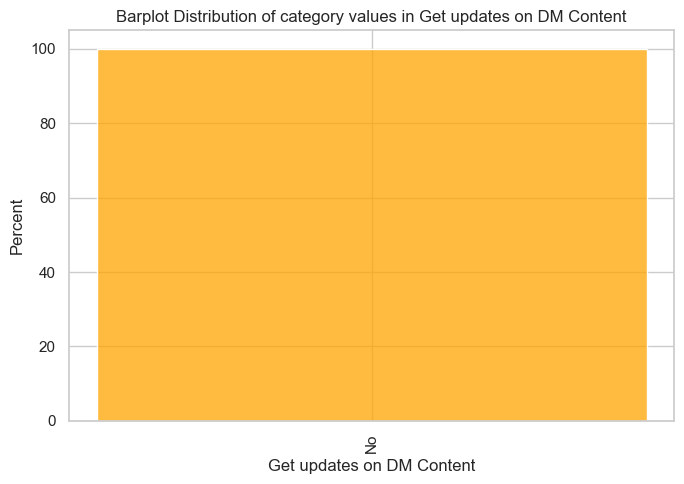

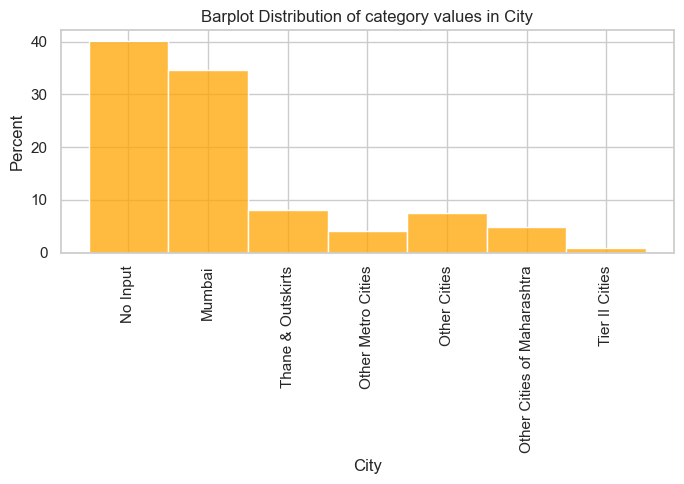

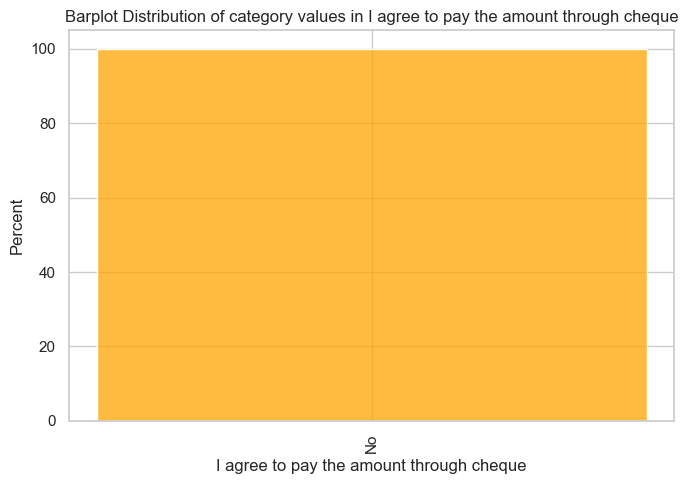

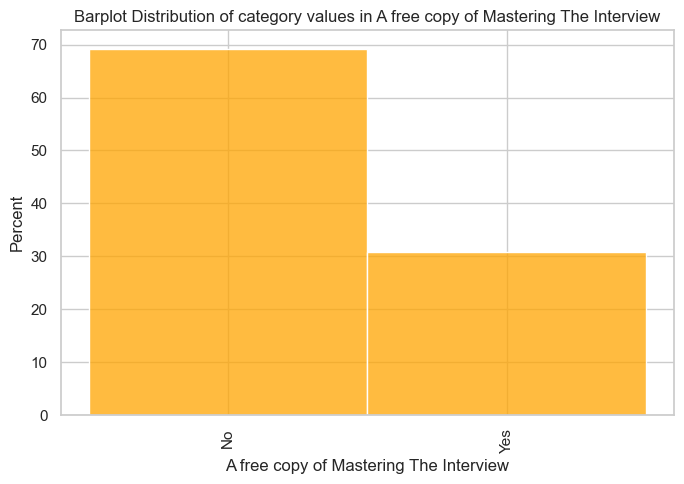

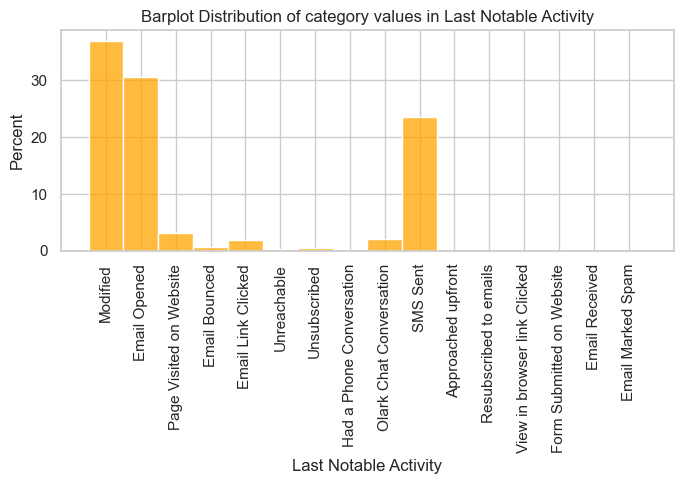

In [33]:
# Bar plots for all the categorical columns except 'Prospect ID'

# sns.set(style="whitegrid")

for col in catCols:
    if col != 'Prospect ID':
        plt.figure(figsize=(7,5))

        # Bar plot to visualize distribution of category values
        sns.histplot(data=data, x=col, color='orange', stat='percent', element='bars')
        plt.title(f'Barplot Distribution of category values in {col}')
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()


In [34]:
# The following columns have a single category value
# Magazine
# X Education Forums
# Receive More Updates About Our Courses
# Update me on Supply Chain Content
# Get updates on DM Content
# I agree to pay the amount through cheque
# These variables can be dropped

# Tag column is not so relevant due to no good distribution of values
# data.Tags.value_counts(dropna=False, normalize=True)
# it can be dropped too

removeable_columns = ['Tags',
                    'Magazine',
                    'X Education Forums',
                    'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

data.drop(columns=removeable_columns, axis=1, inplace=True)
data.shape

(9090, 23)

In [35]:
# readjust numerical and categorical columns lists

In [36]:
numCols = [col for col in numCols if col != 'Lead Number']
numCols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [37]:
catCols = [col for col in catCols if col != 'Prospect ID' and col not in removeable_columns]
catCols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

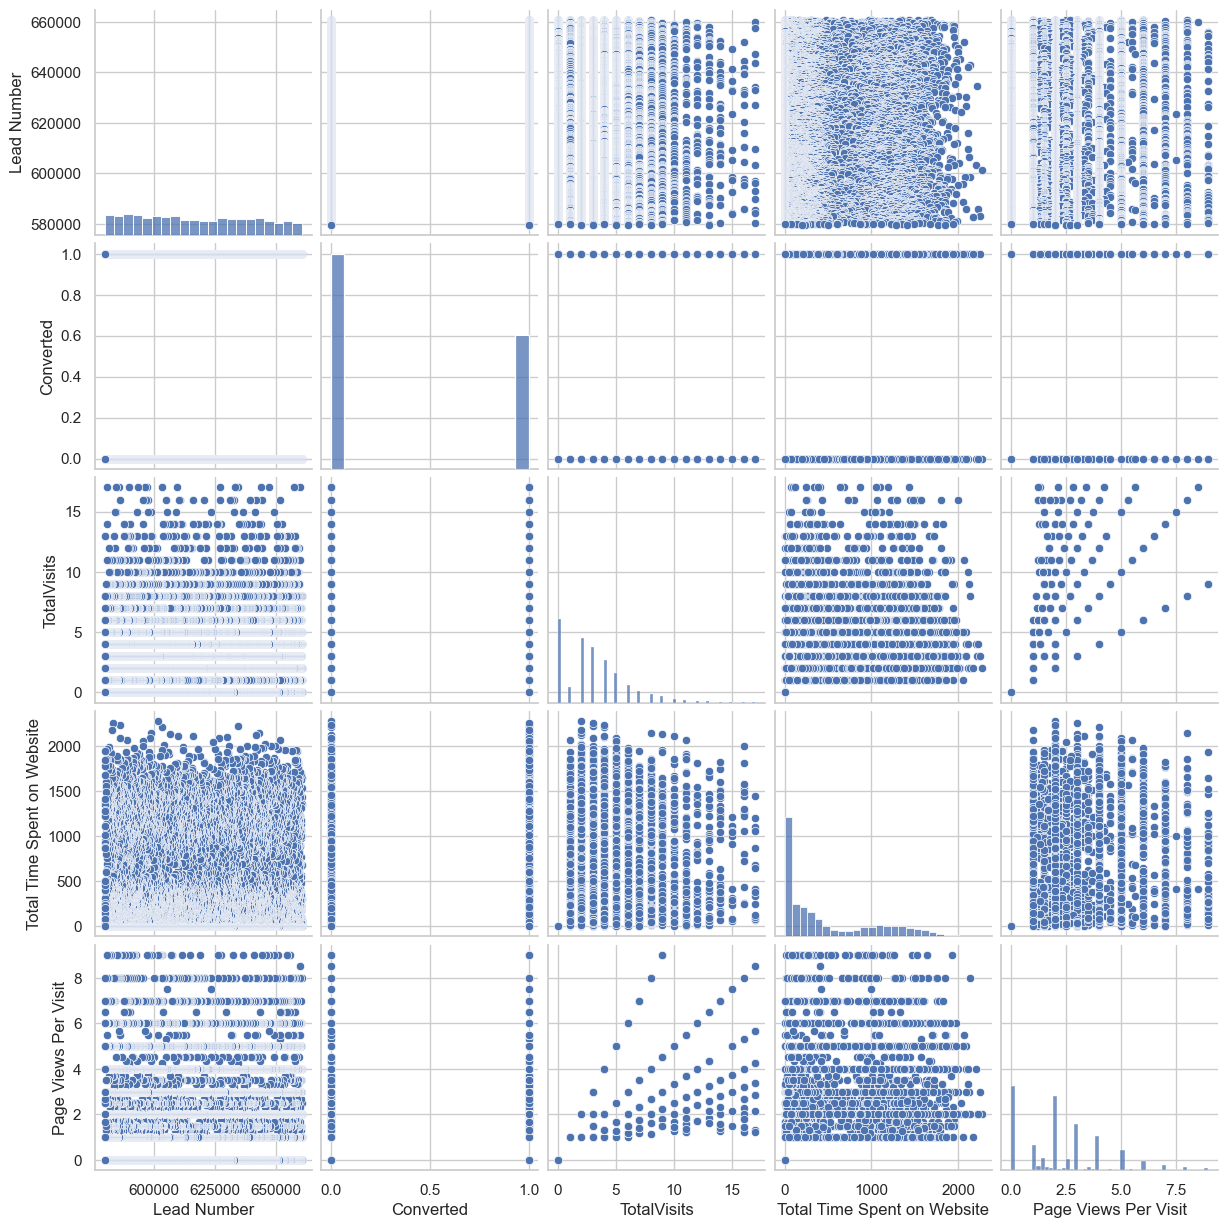

In [38]:
# Scatter plots to see correlation among all numerical columns
sns.pairplot(data=data)
plt.show()

In [39]:
# A good correlation is only between 'TotalVisits' and 'Page Views Per Visit'

In [40]:
data[numCols].dtypes

Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
dtype: object

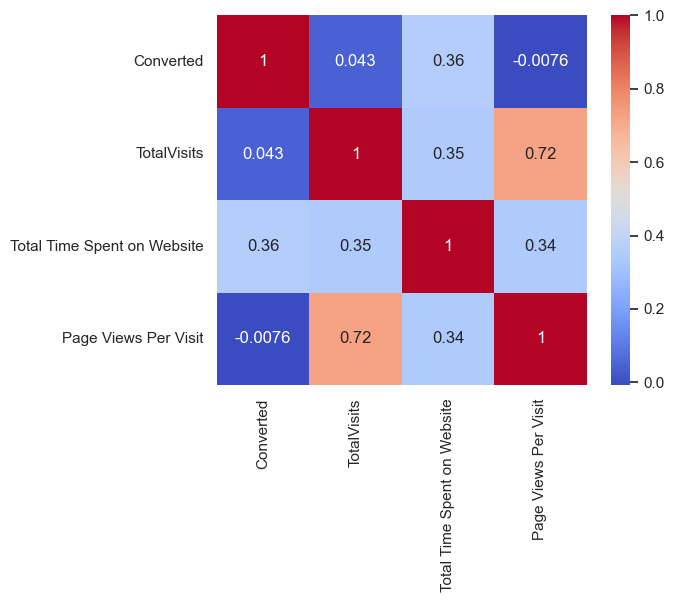

In [41]:
# plot heatmap on the correlation among numerical columns

sns.heatmap(data=data[numCols].corr(), square=True, annot=True, cmap='coolwarm')
plt.show()

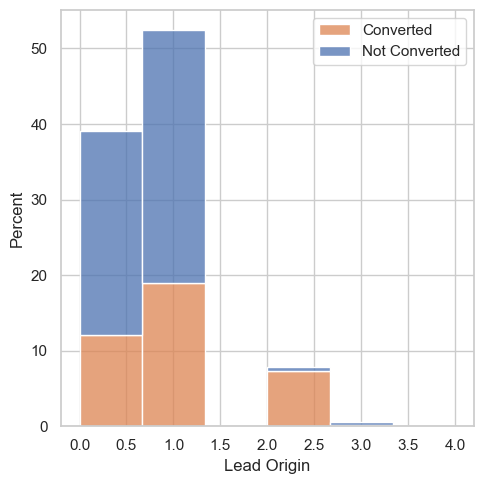

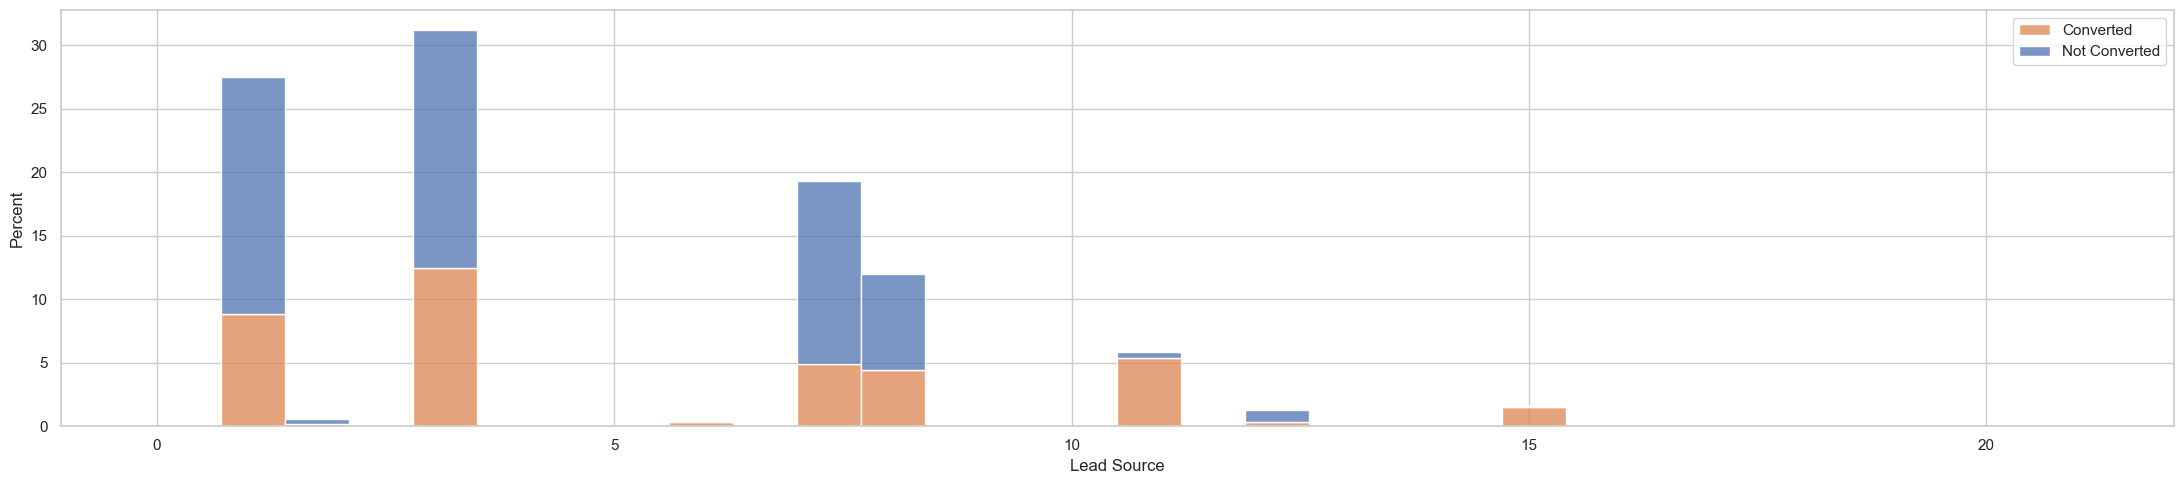

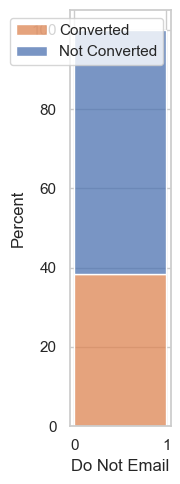

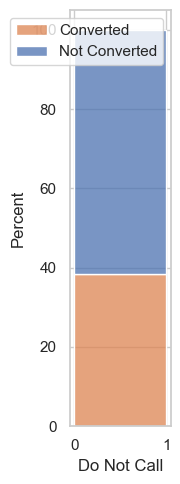

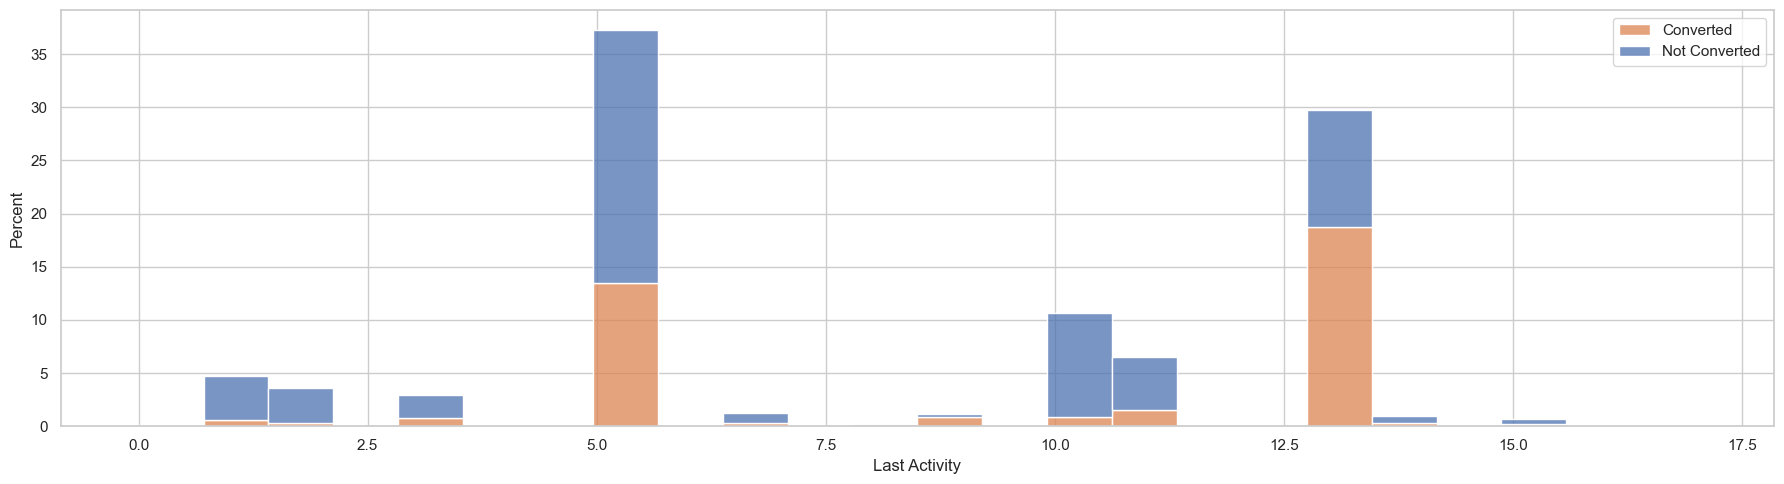

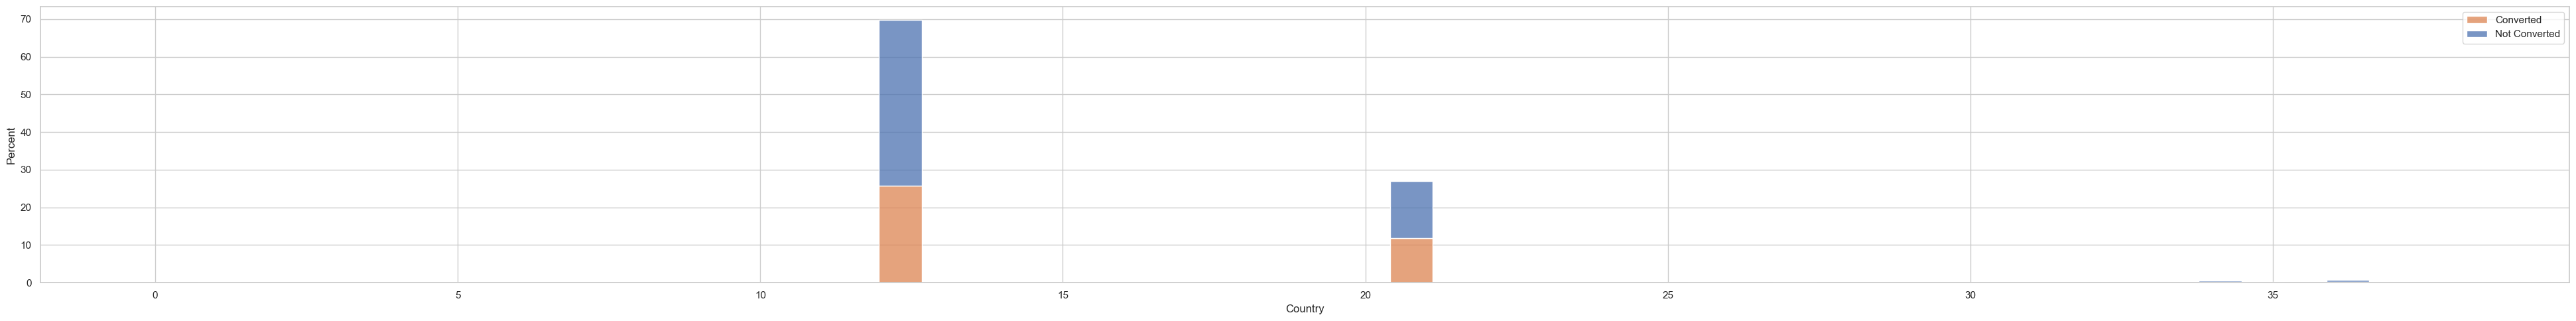

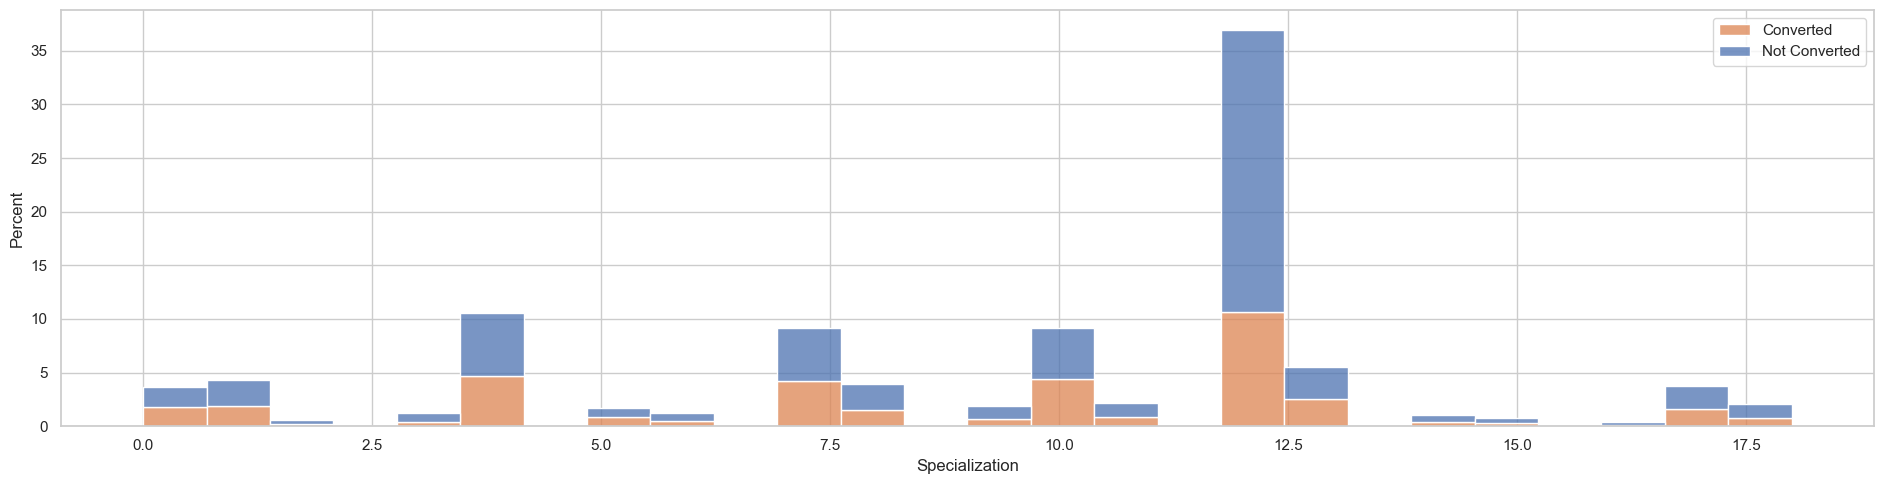

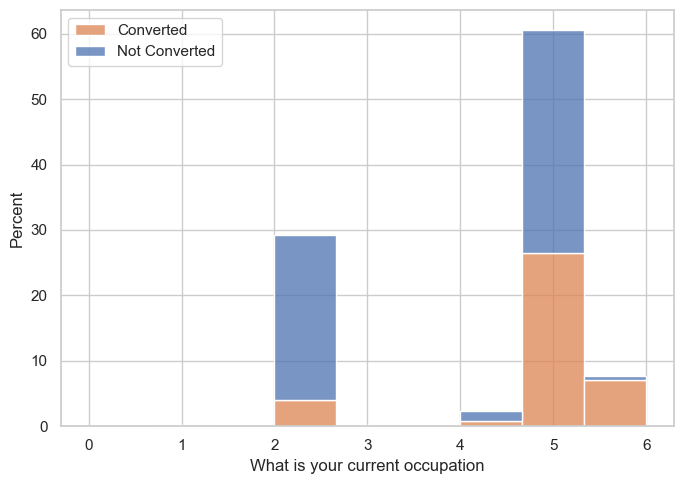

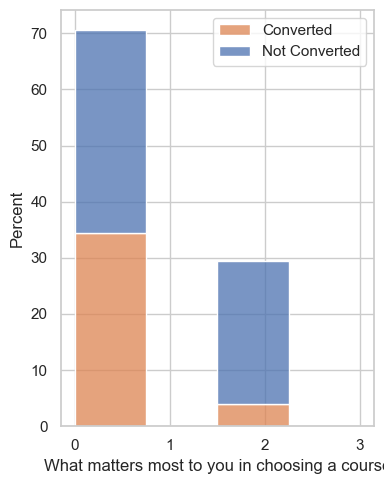

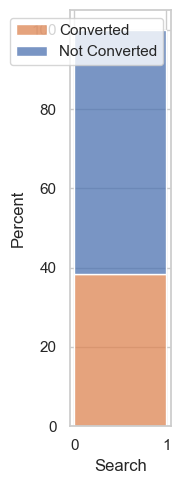

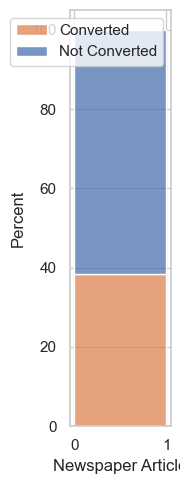

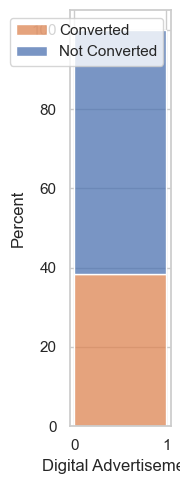

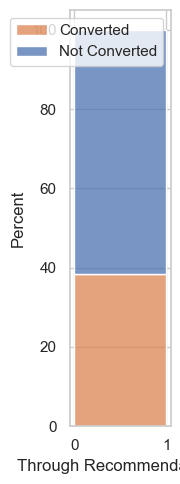

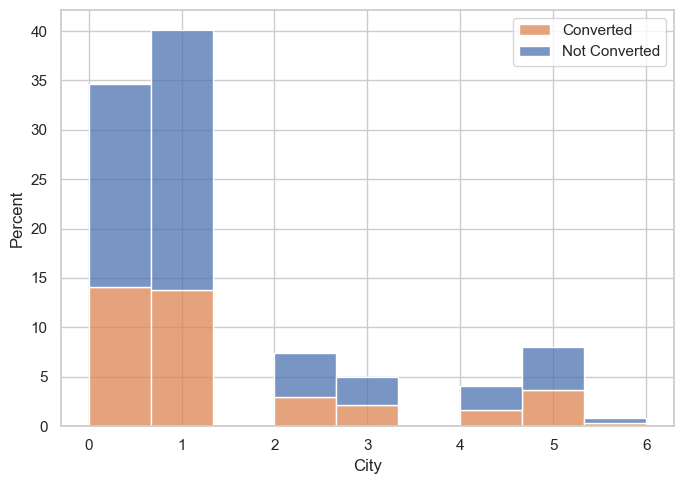

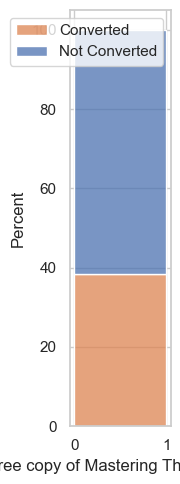

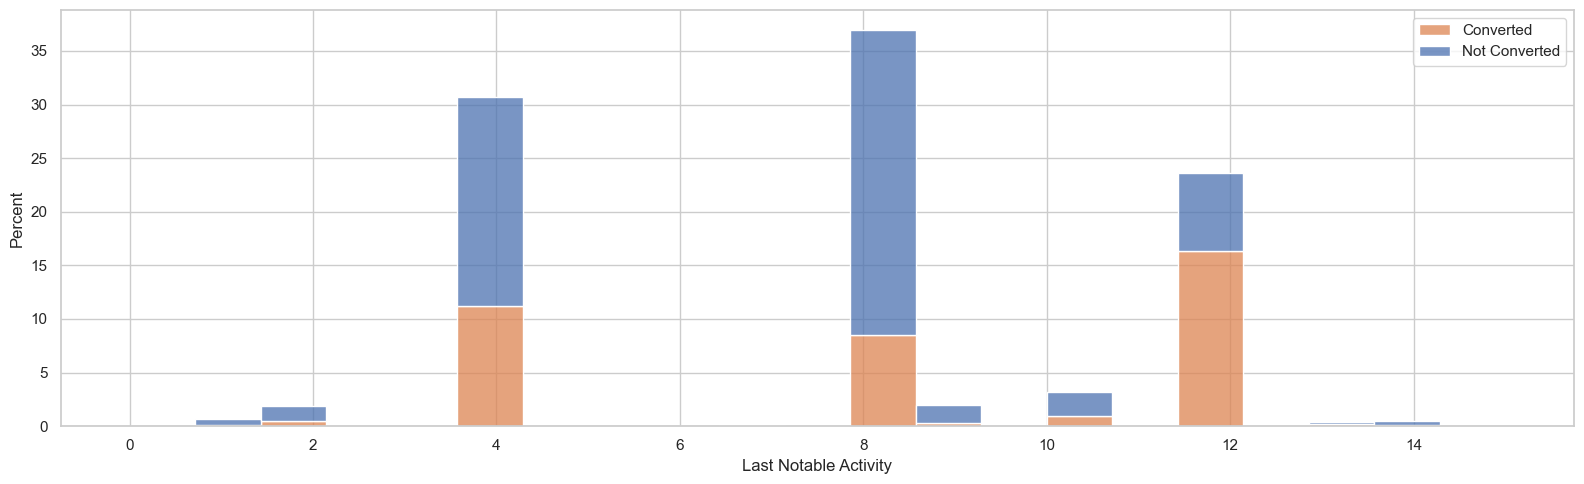

In [132]:
# Stacked Bar plots for all the categorical columns except 'Prospect ID' w.r.t Target column 'Converted'

# sns.set(style="whitegrid")

for col in catCols:

    uniqVals = data[col].nunique()
    plt.figure(figsize=(uniqVals,5))
    sns.histplot(data=data, hue='Converted', x=col, stat='percent', multiple='stack', binwidth=0.7)
    # plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    # plt.xlabel(col, fontdict={'fontsize': 12,'color': 'blue'})
    # plt.ylabel('Percentage', fontdict={'fontsize': 12,'color': 'blue'})
    # plt.xticks(rotation=90)
    # plt.yticks(rotation=0)
    plt.legend(['Converted', 'Not Converted'])
    plt.tight_layout()
    plt.show()
    
    
    # plt.figure(figsize=(7,5))
    # # Stacked Bar plot to visualize distribution of category values w.r.t 'Converted' column
    # sns.histplot(data=data, hue='Converted', x=col, stat='percent', multiple='stack')
    # # sns.barplot(data=data, x='Converted', y=col, color='orange')
    # plt.title(f'Barplot Distribution of category values in {col}')
    # plt.xticks(rotation=90)
    # plt.tight_layout()
    # plt.show()

In [44]:
# The bar stacked plot needs to be rechecked 

In [45]:
# ##############################################

### Feature Engineering
    - Add features
    - Dummies creation
    - Label encoding

In [46]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# The following set of columns can be probably clubbed
# 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
# 'Newspaper Article', 'Newspaper'
# 'Last Activity', 'Last Notable Activity'

In [48]:
# A new column can be derived as 'TotalPageViews'
# calculated as 'TotalVisits' X 'Page Views Per Visit'

data['TotalPageViews'] = data['TotalVisits'] * data['Page Views Per Visit']
data[['TotalPageViews', 'TotalVisits', 'Page Views Per Visit']]

,TotalPageViews,TotalVisits,Page Views Per Visit
0,0.00,0.0,0.00
1,12.50,5.0,2.50
2,4.00,2.0,2.00
3,1.00,1.0,1.00
4,2.00,2.0,1.00
...,...,...,...
9235,21.36,8.0,2.67
9236,4.00,2.0,2.00
9237,4.00,2.0,2.00
9238,9.00,3.0,3.00


In [49]:
# The columns 'TotalVisits' and	'Page Views Per Visit' can now be dropped

data.drop(columns=['TotalVisits', 'Page Views Per Visit'], inplace=True, axis=1)
data.shape

(9090, 22)

In [50]:
# Look at the 'Newspaper' and 'Newspaper Article' columns
data[['Newspaper Article', 'Newspaper']]

,Newspaper Article,Newspaper
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
9235,No,No
9236,No,No
9237,No,No
9238,No,No


In [51]:
# 'Newspaper Article' and 'Newspaper' seem similar in information

# Look at instances where their values are different
data[data['Newspaper Article'] != data['Newspaper']]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Country,...,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,TotalPageViews
3414,d8350bea-ec66-4c36-a2d0-630f8c0e0c93,627531,Landing Page Submission,Direct Traffic,No,No,0,1812,Email Opened,India,...,Better Career Prospects,No,No,Yes,No,No,No Input,No,Email Opened,33.3
8473,4448bb30-cc2c-42ea-893b-ac6e806fcacc,585174,Landing Page Submission,Organic Search,No,No,1,1005,Email Opened,India,...,Better Career Prospects,No,Yes,No,No,No,No Input,No,Modified,81.0


In [52]:
# Only 2 instances of these 2 features have differences.
# One of these columns can be dropped

data.drop(columns='Newspaper', inplace=True, axis=1)
data.shape

(9090, 21)

In [53]:
# Look at 'Last Activity' and 'Last Notable Activity'

data[['Last Activity', 'Last Notable Activity']]

,Last Activity,Last Notable Activity
0,Page Visited on Website,Modified
1,Email Opened,Email Opened
2,Email Opened,Email Opened
3,Unreachable,Modified
4,Converted to Lead,Modified
...,...,...
9235,Email Marked Spam,Email Marked Spam
9236,SMS Sent,SMS Sent
9237,SMS Sent,SMS Sent
9238,SMS Sent,SMS Sent


In [54]:
# 'Last Activity' and 'Last Notable Activity' seem quite related/similar in information

# Look at instances where their values are different
data[data['Last Activity'] != data['Last Notable Activity']]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,TotalPageViews
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,Page Visited on Website,No Input,...,Unemployed,Better Career Prospects,No,No,No,No,No Input,No,Modified,0.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,305,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,No,Modified,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,1428,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,No,Modified,2.0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0,Olark Chat Conversation,No Input,...,No Input,No Input,No,No,No,No,No Input,No,Modified,0.0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,1640,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,No,Modified,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,API,Olark Chat,No,No,0,0,SMS Sent,No Input,...,Unemployed,Better Career Prospects,No,No,No,No,No Input,No,Modified,0.0
9228,40d3b3cf-d939-49ff-bea5-60e8d4025104,579717,Landing Page Submission,Google,No,No,1,1944,SMS Sent,India,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,Yes,Modified,8.0
9229,5cfdd915-d5a0-4976-b38d-e5f72ec55526,579712,Landing Page Submission,Organic Search,No,No,1,1226,SMS Sent,India,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,Yes,Modified,84.5
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,210,SMS Sent,India,...,Unemployed,Better Career Prospects,No,No,No,No,Mumbai,No,Modified,12.5


In [55]:
# There are significant number of records with different informaiton in these 2 columns, so both can be kept

In [56]:
# readjust categorical and numerical columns list
numCols = [col for col in numCols if col not in ['TotalVisits', 'Page Views Per Visit']]
catCols = [col for col in catCols if col not in ['Newspaper']]

In [57]:
data.shape

(9090, 21)

In [58]:
# Handling Categorical columns for feature engineering
# Approach 1: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
le = LabelEncoder()

# fit label encoder on the categorical columns for the transformation to numerical values
for col in catCols:
    data[col] = le.fit_transform(data[col])

In [59]:
# Handling Categorical columns for feature engineering
# Approach 2: Dummies creation

# dummies = pd.get_dummies(data[catCols], drop_first=True)  # drop_first=True to avoid multicollinearity
# data_dummies = pd.concat([data.drop(catCols, axis=1), dummies], axis=1)


### Data split
    - Predictors (X) and Target (y)
    - Train and Test datasets
    - Scaling
        - MinMax Scaling
        - Std Scaling

In [60]:
X = data.drop('Converted', axis=1)
y = data['Converted']

In [62]:
# drop columns irrelevant for the analysis
X.drop(columns=['Prospect ID', 'Lead Number'], inplace=True, axis=1)
X

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,TotalPageViews
0,0,7,0,0,0,11,21,12,5,0,0,0,0,0,1,0,8,0.00
1,0,8,0,0,674,5,12,12,5,0,0,0,0,0,1,0,4,12.50
2,1,1,0,0,1532,5,12,1,4,0,0,0,0,0,0,1,4,4.00
3,1,1,0,0,305,14,12,11,5,0,0,0,0,0,0,0,8,1.00
4,1,3,0,0,1428,1,12,12,5,0,0,0,0,0,0,0,8,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,1,0,1845,4,26,8,5,0,0,0,0,0,0,0,3,21.36
9236,1,1,0,0,238,13,12,11,5,0,0,0,0,0,0,1,12,4.00
9237,1,1,1,0,199,13,12,1,5,0,0,0,0,0,0,1,12,4.00
9238,1,3,0,0,499,13,12,7,2,2,0,0,0,0,4,0,12,9.00


In [63]:
# Split the X and y variables into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(6363, 18)
(2727, 18)


In [64]:
# Apply scaling on the train dataset to bring all the numerical values into similar ranges
# Apply min-max scaling for that

from sklearn.preprocessing import MinMaxScaler

# Instantiate min-max scaler
scaler = MinMaxScaler()

# fit X_train dataset to transform to similar ranges
X_train_scaled = scaler.fit_transform(X_train)

In [65]:
# X_train_scaled output from the scaling operation is an nd array
# convert this to pandas data frame

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,TotalPageViews
0,0.00,0.333333,0.0,0.0,0.000000,0.3125,0.552632,0.666667,0.333333,0.666667,0.0,0.0,0.0,0.0,0.166667,0.0,0.266667,0.000000
1,0.25,0.380952,0.0,0.0,0.074824,0.3125,0.315789,0.055556,0.833333,0.000000,0.0,0.0,0.0,0.0,0.833333,1.0,0.266667,0.173010
2,0.25,0.047619,0.0,0.0,0.611356,0.1875,0.315789,0.555556,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.133333,0.062284
3,0.50,0.523810,0.0,0.0,0.000000,0.3125,0.552632,0.388889,0.833333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.533333,0.000000
4,0.25,0.142857,0.0,0.0,0.117077,0.8125,0.315789,0.388889,0.833333,0.000000,0.0,0.0,0.0,0.0,0.833333,0.0,0.533333,0.173010


### Model Building
    - Logistic Regression
    - RFE for feature selection

In [67]:
# Apply Logistic Regression

from sklearn.linear_model import LogisticRegression

# instantiate logistic regression
logReg = LogisticRegression()
logReg.fit(X_train_scaled_df, y_train)


LogisticRegression()

In [68]:
# For feature selection, use RFE

from sklearn.feature_selection import RFE

# instantiate RFE
rfe = RFE(estimator=logReg, n_features_to_select=None)

# fit RFE on the train data
rfe = rfe.fit(X_train_scaled_df, y_train)


In [71]:
# Look at the RFE selected features and their ranks

list(zip(X_train_scaled_df.columns, rfe.support_, rfe.ranking_))


[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', False, 4),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', False, 7),
 ('Newspaper Article', False, 10),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', False, 2),
 ('City', False, 9),
 ('A free copy of Mastering The Interview', False, 5),
 ('Last Notable Activity', False, 3),
 ('TotalPageViews', True, 1)]

In [72]:
# another approach for feature selection is itemgetter

from operator import itemgetter

# extract columns
features = X_train_scaled_df.columns.to_list()

# extract selected features from RFE using itemgetter
for X, y in (sorted(zip(rfe.ranking_, features), key=itemgetter(0))):
    print(X,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 Total Time Spent on Website
1 Last Activity
1 Country
1 What is your current occupation
1 What matters most to you in choosing a course
1 TotalPageViews
2 Through Recommendations
3 Last Notable Activity
4 Specialization
5 A free copy of Mastering The Interview
6 Digital Advertisement
7 Search
8 Do Not Call
9 City
10 Newspaper Article


In [73]:
# For feature selection, use RFE

from sklearn.feature_selection import RFE

# instantiate RFE
rfe15 = RFE(estimator=logReg, n_features_to_select=15)

# fit RFE on the train data
rfe15 = rfe15.fit(X_train_scaled_df, y_train)


In [74]:
# Look at the RFE selected features and their ranks

list(zip(X_train_scaled_df.columns, rfe15.support_, rfe15.ranking_))


[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', False, 4),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('City', False, 3),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1),
 ('TotalPageViews', True, 1)]

In [75]:
# another approach for feature selection is itemgetter

from operator import itemgetter

# extract columns
features = X_train_scaled_df.columns.to_list()

# extract selected features from RFE using itemgetter
for X, y in (sorted(zip(rfe15.ranking_, features), key=itemgetter(0))):
    print(X,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 Total Time Spent on Website
1 Last Activity
1 Country
1 Specialization
1 What is your current occupation
1 What matters most to you in choosing a course
1 Search
1 Digital Advertisement
1 Through Recommendations
1 A free copy of Mastering The Interview
1 Last Notable Activity
1 TotalPageViews
2 Do Not Call
3 City
4 Newspaper Article


In [76]:
# For feature selection, use RFE

from sklearn.feature_selection import RFE

# instantiate RFE
rfe18 = RFE(estimator=logReg, n_features_to_select=18)

# fit RFE on the train data
rfe18 = rfe18.fit(X_train_scaled_df, y_train)


In [77]:
# Look at the RFE selected features and their ranks

list(zip(X_train_scaled_df.columns, rfe18.support_, rfe18.ranking_))


[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('City', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1),
 ('TotalPageViews', True, 1)]

In [78]:
# another approach for feature selection is itemgetter

from operator import itemgetter

# extract columns
features = X_train_scaled_df.columns.to_list()

# extract selected features from RFE using itemgetter
for X, y in (sorted(zip(rfe18.ranking_, features), key=itemgetter(0))):
    print(X,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 Do Not Call
1 Total Time Spent on Website
1 Last Activity
1 Country
1 Specialization
1 What is your current occupation
1 What matters most to you in choosing a course
1 Search
1 Newspaper Article
1 Digital Advertisement
1 Through Recommendations
1 City
1 A free copy of Mastering The Interview
1 Last Notable Activity
1 TotalPageViews


In [82]:
# select the columns selected by RFE:rfe15
# This means columns with rank 1

cols15 = X_train_scaled_df.columns[rfe15.support_]

X_train_scaled = X_train_scaled_df[cols15]

In [80]:
# Resetting indices to make sure they align

# X_train_scaled_selected = X_train_scaled_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [83]:
# fit logistic regression model on X_train after adding a constant

import statsmodels.api as sm

# add constant as statsmodel doesn;t add a constant by itself, unlike sklearn
X_train_sm = sm.add_constant(X_train_scaled)

# instantiate a log reg model with statsmodels library generalized linear model function
logRegGLM = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fit the model
res = logRegGLM.fit()

# check the summary from the statsmodels library
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.4
Date:                Sun, 19 Jan 2025   Deviance:                       5898.9
Time:                        17:04:53   Pearson chi2:                 6.51e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3326
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -8.0272      0.493    -16.288      0.000      -8.993      -7.061
Lead Origin                                       2.1371      0.222      9.607      0.000       1.701       2.573
Lead Source                                       3.0075      0.237     12.684      0.000       2.543       3.472
Do Not Email                                     -1.5470      0.159     -9.736      0.000      -1.858      -1.236
Total Time Spent on Website                       4.2866      0.157     27.277      0.000       3.979       4.595
Last Activity                                     1.3780      0.214      6.426      0.000       0.958       1.798
Country                                           1.7643      0.301      5.866      0.000       1.175       2.354
Specialization                                   -0.4449      0.142     -3.138      0.002      -0.723      -0.167
What is your current occupation                   5.5965      0.544     10.284      0.000       4.530       6.663
What matters most to you in choosing a course     1.8194      0.428      4.250      0.000       0.980       2.659
Search                                            0.0400      0.746      0.054      0.957      -1.423       1.503
Digital Advertisement                           -19.7033   1.25e+04     -0.002      0.999   -2.46e+04    2.45e+04
Through Recommendations                           1.7166      1.337      1.284      0.199      -0.904       4.337
A free copy of Mastering The Interview           -0.4021      0.079     -5.067      0.000      -0.558      -0.247
Last Notable Activity                             0.6161      0.252      2.449      0.014       0.123       1.109
TotalPageViews                                   -1.1624      0.349     -3.330      0.001      -1.847      -0.478
=================================================================================================================
"""

In [88]:
# Now look at the VIF scores of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_sm = X_train_sm.astype(dtype=float)

# calculate VIF

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,186.94
8,What is your current occupation,13.46
9,What matters most to you in choosing a course,13.27
14,Last Notable Activity,2.54
5,Last Activity,2.52
6,Country,1.49
2,Lead Source,1.45
13,A free copy of Mastering The Interview,1.32
1,Lead Origin,1.26
4,Total Time Spent on Website,1.22


In [90]:
# select the columns selected by RFE:rfe18
# This means columns with rank 1

cols18 = X_train_scaled_df.columns[rfe18.support_]

X_train_scaled = X_train_scaled_df[cols18]

In [91]:
# Resetting indices to make sure they align

# X_train_scaled_selected = X_train_scaled_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [92]:
# fit logistic regression model on X_train after adding a constant

import statsmodels.api as sm

# add constant as statsmodel doesn;t add a constant by itself, unlike sklearn
X_train_sm = sm.add_constant(X_train_scaled)

# instantiate a log reg model with statsmodels library generalized linear model function
logRegGLM = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fit the model
res = logRegGLM.fit()

# check the summary from the statsmodels library
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2948.2
Date:                Sun, 19 Jan 2025   Deviance:                       5896.4
Time:                        17:10:07   Pearson chi2:                 6.51e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3329
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -8.0453      0.493    -16.312      0.000      -9.012      -7.079
Lead Origin                                       2.1254      0.223      9.545      0.000       1.689       2.562
Lead Source                                       3.0103      0.237     12.699      0.000       2.546       3.475
Do Not Email                                     -1.5452      0.159     -9.726      0.000      -1.857      -1.234
Do Not Call                                      20.8904   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Total Time Spent on Website                       4.2781      0.157     27.216      0.000       3.970       4.586
Last Activity                                     1.3816      0.215      6.439      0.000       0.961       1.802
Country                                           1.7707      0.301      5.887      0.000       1.181       2.360
Specialization                                   -0.4512      0.142     -3.180      0.001      -0.729      -0.173
What is your current occupation                   5.5789      0.545     10.245      0.000       4.512       6.646
What matters most to you in choosing a course     1.8065      0.428      4.217      0.000       0.967       2.646
Search                                            0.0439      0.745      0.059      0.953      -1.417       1.505
Newspaper Article                              1.489e-10   2.43e-07      0.001      1.000   -4.75e-07    4.75e-07
Digital Advertisement                           -20.6933   2.07e+04     -0.001      0.999   -4.05e+04    4.05e+04
Through Recommendations                           1.7094      1.325      1.290      0.197      -0.887       4.306
City                                              0.1640      0.126      1.305      0.192      -0.082       0.410
A free copy of Mastering The Interview           -0.4070      0.079     -5.120      0.000      -0.563      -0.251
Last Notable Activity                             0.6172      0.252      2.452      0.014       0.124       1.110
TotalPageViews                                   -1.1678      0.349     -3.344      0.001      -1.852      -0.483
=================================================================================================================
"""

In [88]:
# Now look at the VIF scores of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_sm = X_train_sm.astype(dtype=float)

# calculate VIF

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,186.94
8,What is your current occupation,13.46
9,What matters most to you in choosing a course,13.27
14,Last Notable Activity,2.54
5,Last Activity,2.52
6,Country,1.49
2,Lead Source,1.45
13,A free copy of Mastering The Interview,1.32
1,Lead Origin,1.26
4,Total Time Spent on Website,1.22


In [93]:
# select the columns selected by RFE:rfe18
# This means columns with rank 1

cols10 = X_train_scaled_df.columns[rfe.support_]

X_train_scaled = X_train_scaled_df[cols10]

In [94]:
# Resetting indices to make sure they align

# X_train_scaled_selected = X_train_scaled_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [95]:
# fit logistic regression model on X_train after adding a constant

import statsmodels.api as sm

# add constant as statsmodel doesn;t add a constant by itself, unlike sklearn
X_train_sm = sm.add_constant(X_train_scaled)

# instantiate a log reg model with statsmodels library generalized linear model function
logRegGLM = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# fit the model
res = logRegGLM.fit()

# check the summary from the statsmodels library
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2971.3
Date:                Sun, 19 Jan 2025   Deviance:                       5942.5
Time:                        17:11:23   Pearson chi2:                 6.52e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3280
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -8.3526      0.489    -17.095      0.000      -9.310      -7.395
Lead Origin                                       2.0136      0.208      9.695      0.000       1.607       2.421
Lead Source                                       3.2258      0.226     14.266      0.000       2.783       3.669
Do Not Email                                     -1.5201      0.157     -9.677      0.000      -1.828      -1.212
Total Time Spent on Website                       4.2599      0.156     27.278      0.000       3.954       4.566
Last Activity                                     1.7937      0.129     13.918      0.000       1.541       2.046
Country                                           1.7111      0.299      5.721      0.000       1.125       2.297
What is your current occupation                   5.7106      0.545     10.482      0.000       4.643       6.778
What matters most to you in choosing a course     1.8779      0.429      4.382      0.000       1.038       2.718
TotalPageViews                                   -1.4334      0.342     -4.185      0.000      -2.105      -0.762
=================================================================================================================
"""

In [96]:
# Now look at the VIF scores of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_sm = X_train_sm.astype(dtype=float)

# calculate VIF

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,179.47
7,What is your current occupation,13.41
8,What matters most to you in choosing a course,13.24
6,Country,1.47
2,Lead Source,1.30
4,Total Time Spent on Website,1.22
9,TotalPageViews,1.16
1,Lead Origin,1.09
5,Last Activity,1.02
3,Do Not Email,1.01


In [97]:
# p-values in case of 10 features selected from RFE are good
# VIF in this case is high for 2 variables which seem important for the model, so we can keep those

In [98]:
# for 15 and 18 features selected cases, further changes can be done to come to final number of features
# This is done by dropping columnsbased on p-values and VIF combinations

### Model Evaluation: Training data
    - Accuracy
    - Precision
    - Recall
    - Sensitivity
    - Specificity
    - ROC Curve
    - ...

In [101]:
# Predictions on training dataset
y_train_pred_prob = res.predict(X_train_sm)

# convert the values to fit in 1 and 0
y_train_pred = (y_train_pred_prob>=0.5).astype(int)


In [102]:
# Look at the various metrics to evaluate whether model is good enough

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Basic accuracy and ROC AUC score
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_pred_prob))

# Detailed classification report
print("Classification Report (Training):\n", classification_report(y_train, y_train_pred))


Training Accuracy: 0.787050133584787
Training ROC AUC: 0.8503142981909964
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      3923
           1       0.76      0.64      0.70      2440

    accuracy                           0.79      6363
   macro avg       0.78      0.76      0.77      6363
weighted avg       0.78      0.79      0.78      6363



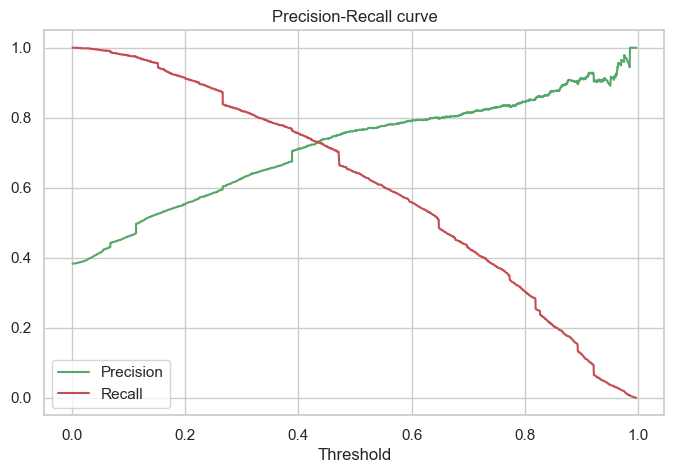

In [103]:
# Look at precision recall metrics

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred_prob)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], "g-", label='Precision')
plt.plot(thresholds, recall[:-1], "r-", label='Recall')
plt.title('Precision-Recall curve')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [105]:
# look at roc curve

from sklearn.metrics import roc_curve

# Calculate the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = roc_auc_score(y_train, y_train_pred_prob)

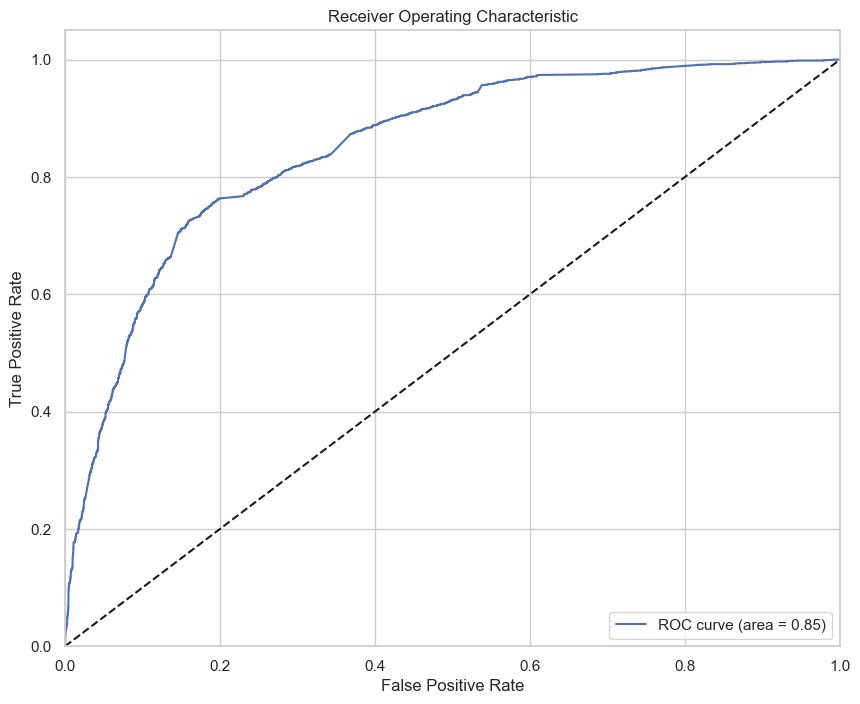

In [106]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [107]:
# The area under ROC curve is 0.95 and it is pretty good.

### Model Evaluation: Test data
    - Accuracy
    - Precision
    - Recall
    - Sensitivity
    - Specificity
    - ROC Curve
    - ...

In [110]:
len(X_train.columns)

18

In [111]:
len(X_test.columns)

18

In [112]:
# fit X_train dataset to transform to similar ranges
X_test_scaled = scaler.transform(X_test)

In [116]:
X_train_sm.columns

Index(['const', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'TotalPageViews'],
      dtype='object')

In [117]:
# get similar columns into test data
X_test_selected = X_test[X_train_sm.drop('const', axis=1).columns]
X_test_selected.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'TotalPageViews'],
      dtype='object')

In [118]:
# add constant
X_test_sm = sm.add_constant(X_test_selected)

In [119]:
# Predictions on test dataset
y_test_pred_prob = res.predict(X_test_sm)

# convert the values to fit in 1 and 0
y_test_pred = (y_test_pred_prob>=0.5).astype(int)


In [121]:
# Look at the various metrics to evaluate whether model is working good with test data

from sklearn.metrics import confusion_matrix

# Basic accuracy and ROC AUC score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Detailed classification report
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.3872387238723872
Confusion Matrix:
 [[   1 1671]
 [   0 1055]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1672
           1       0.39      1.00      0.56      1055

    accuracy                           0.39      2727
   macro avg       0.69      0.50      0.28      2727
weighted avg       0.76      0.39      0.22      2727



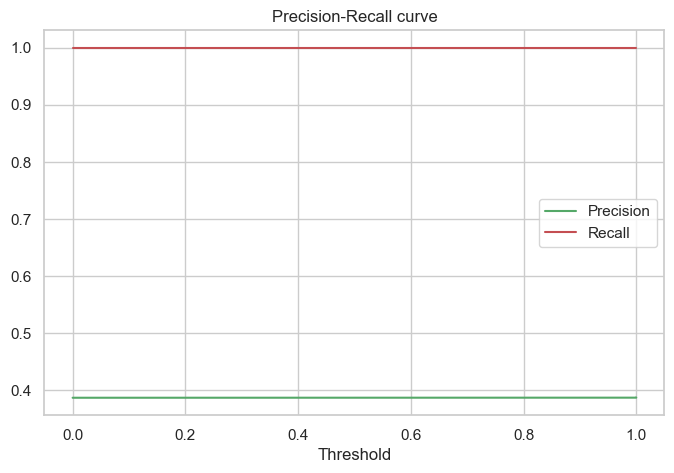

In [122]:
# Look at precision recall metrics

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], "g-", label='Precision')
plt.plot(thresholds, recall[:-1], "r-", label='Recall')
plt.title('Precision-Recall curve')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [123]:
# Get the coefficients from the model
coef_table = res.summary2().tables[1]

In [124]:
# Sort the coefficients by their absolute values in descending order
sorted_coef_table = coef_table.sort_values(by='Coef.', key=lambda x: x.abs(), ascending=False)
pd.set_option('display.width', 120)
print(sorted_coef_table)

                                                  Coef.  Std.Err.          z          P>|z|    [0.025    0.975]
const                                         -8.352583  0.488596 -17.095066   1.615141e-65 -9.310214 -7.394953
What is your current occupation                5.710562  0.544811  10.481739   1.047992e-25  4.642753  6.778371
Total Time Spent on Website                    4.259865  0.156165  27.277929  7.752765e-164  3.953787  4.565944
Lead Source                                    3.225803  0.226117  14.266084   3.560145e-46  2.782622  3.668983
Lead Origin                                    2.013638  0.207697   9.695077   3.163997e-22  1.606560  2.420717
What matters most to you in choosing a course  1.877864  0.428589   4.381508   1.178606e-05  1.037846  2.717882
Last Activity                                  1.793679  0.128874  13.918049   4.921545e-44  1.541090  2.046268
Country                                        1.711086  0.299089   5.720995   1.059018e-08  1.124883  2

### CV (Cross Verification) and Hyper Parameters Tuning

### Predictions

### Conclusion and Recommendations